<a href="https://colab.research.google.com/github/shashank297/GDP_EDA/blob/main/GDP_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download the dataset from this [link](https://www.kaggle.com/datasets/rajkumarpandey02/list-of-countries-by-gdp-sector-composition). You can find the dataset description there itself. Read it carefully and answer the questions below

**Make sure you write necessary Python code and use necessary visuals to support your answer**


# Column metadata
`Rank`: The rank of the country/economy based on its GDP.

`Country/Economy`: The name of the country or economy.

`GDP (millions of $)`: The gross domestic product (GDP) of the country or economy, measured in millions of dollars.

`Agriculture GDP`: The GDP contribution of the agriculture sector in the country or economy.

`Agr_Rank`: The rank of the country or economy based on its agriculture GDP.

`agr_% of GDP`: The percentage of GDP contributed by the agriculture sector.

`Industry`: The GDP contribution of the industry sector in the country or economy.

`Ind_Rank`: The rank of the country or economy based on its industry GDP.

`Ind_% of GDP`: The percentage of GDP contributed by the industry sector.

`Services`: The GDP contribution of the services sector in the country or economy.

`Services_Rank`: The rank of the country or economy based on its services GDP.

`Services_% of GDP`: The percentage of GDP contributed by the services sector.

`Year GDP`: The year in which the GDP data was recorded.

`Year Sector`: The year in which the sector-specific data was recorded.


In [348]:
import pandas as pd
import numpy as np
from google.colab import drive

In [349]:
drive.mount('/drive')
df=pd.read_csv('/drive/My Drive/Data set masai/List of Countries by GDP Sector Composition.csv')
df=df.rename(columns={'Unnamed: 5':'Agr_Rank','Unnamed: 6':'agr_% of GDP','Unnamed: 8':'Ind_Rank','Unnamed: 9':'Ind_% of GDP','Unnamed: 11':'Services_Rank','Unnamed: 12':'Services_% of GDP'})
df.drop(index=0,inplace=True)

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [350]:
df.drop(columns=['Index Number '],inplace=True)

In [351]:
df

,Rank,Country/Economy,GDP (millions of $),Agriculture GDP,Agr_Rank,agr_% of GDP,Industry,Ind_Rank,Ind_% of GDP,Services,Services_Rank,Services_% of GDP,Year GDP,Year Sector
1,1,United States,19360000,174240,3,0.9,3659040,2,18.9,15526720,1,80.2,2017,2017
2,2,China,11940000,991020,1,8.3,4716300,1,39.5,6232680,2,52.2,2017,2017
3,3,Japan,4884000,48840,13,1,1450548,3,29.7,3384612,3,69.3,2017,2017
4,4,Germany,3652000,21912,31,0.6,1099252,4,30.1,2530836,4,69.3,2016,2017
5,5,France,2575000,51500,11,2,517575,7,20.1,2005925,6,77.9,2017,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,-,"Saint Helena, Ascension, and Tristan da Cunha",-,-,-,-,-,-,-,-,-,-,-,-
227,-,Tokelau,-,-,-,-,-,-,-,-,-,-,-,-
228,-,Turks and Caicos Islands,-,-,-,0.5,-,-,8.9,-,-,90.6,-,2017
229,-,Wallis and Futuna,-,-,-,-,-,-,-,-,-,-,-,-


In [352]:
df.replace({'-':np.nan},inplace=True)

#### Find out the dataset dimensions

In [353]:
df.shape

(230, 14)

#### Find out statistical summary of the Dataset

In [354]:
df.describe()

,Rank,Country/Economy,GDP (millions of $),Agriculture GDP,Agr_Rank,agr_% of GDP,Industry,Ind_Rank,Ind_% of GDP,Services,Services_Rank,Services_% of GDP,Year GDP,Year Sector
count,224,230,224,218,218,224,220,220,223,221,221,224,224,225
unique,224,230,224,207,218,149,216,220,171,219,221,177,10,16
top,1,United States,19360000,10,3,1,1036,2,27.8,557,1,74.2,2017,2017
freq,1,1,1,5,1,5,2,1,4,2,1,4,189,184


#### Check for the null values in Dataset

In [355]:
df.isnull().sum()

Rank                    6
Country/Economy         0
GDP (millions of $)     6
Agriculture GDP        12
Agr_Rank               12
agr_% of GDP            6
Industry               10
Ind_Rank               10
Ind_% of GDP            7
Services                9
Services_Rank           9
Services_% of GDP       6
Year GDP                6
Year Sector             5
dtype: int64

#### Check for the noise value of the dataset

In [356]:
for i in df.columns:
  print(i,df[i].unique())

Rank ['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57' '58'
 '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71' '72'
 '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85' '86'
 '87' '88' '89' '90' '91' '92' '93' '94' '95' '96' '97' '98' '99' '100'
 '101' '102' '103' '104' '105' '106' '107' '108' '109' '110' '111' '112'
 '113' '114' '115' '116' '117' '118' '119' '120' '121' '122' '123' '124'
 '125' '126' '127' '128' '129' '130' '131' '132' '133' '134' '135' '136'
 '137' '138' '139' '140' '141' '142' '143' '144' '145' '146' '147' '148'
 '149' '150' '151' '152' '153' '154' '155' '156' '157' '158' '159' '160'
 '161' '162' '163' '164' '165' '166' '167' '168' '169' '170' '171' '172'
 '173' '174' '175' '176' '177' '178' '179' '180' '181' '18

#### Handle the null values in the Dataset

- since the null value is not much so going tp drop all the Null value

In [357]:
df.dropna(inplace=True)

#### Handle the Noise Values in Dataset

In [358]:
df["GDP (millions of $)"] = pd.to_numeric(df["GDP (millions of $)"], errors="coerce")
df["Agriculture GDP"] = pd.to_numeric(df["Agriculture GDP"], errors="coerce")
df["Agr_Rank"] = pd.to_numeric(df["Agr_Rank"], errors="coerce")
df["agr_% of GDP"] = pd.to_numeric(df["agr_% of GDP"], errors="coerce")
df["Industry"] = pd.to_numeric(df["Industry"], errors="coerce")
df["Ind_Rank"] = pd.to_numeric(df["Ind_Rank"], errors="coerce")
df["Ind_% of GDP"] = pd.to_numeric(df["Ind_% of GDP"], errors="coerce")
df["Services"] = pd.to_numeric(df["Services"], errors="coerce")
df["Services_Rank"] = pd.to_numeric(df["Services_Rank"], errors="coerce")
df["Services_% of GDP"] = pd.to_numeric(df["Services_% of GDP"], errors="coerce")
df["Year GDP "] = pd.to_numeric(df["Year GDP "],errors="coerce")
df["Year Sector"] = pd.to_numeric(df["Year Sector"], errors="coerce")
df["Rank"] = pd.to_numeric(df["Rank"], errors="coerce")

- finding those country whose name is not writen right
-we observe that the name is correct but last word is writen fist and seprated by coma

In [359]:
df['Country/Economy'][df['Country/Economy'].str.split(',').str.len()>1]=df['Country/Economy'][df['Country/Economy'].str.split(',').str.len()>1].str.split(',').str[1].str.strip()+' '+df['Country/Economy'][df['Country/Economy'].str.split(',').str.len()>1].str.split(',').str[0]


<ipython-input-359-b1669fa1dfac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country/Economy'][df['Country/Economy'].str.split(',').str.len()>1]=df['Country/Economy'][df['Country/Economy'].str.split(',').str.len()>1].str.split(',').str[1].str.strip()+' '+df['Country/Economy'][df['Country/Economy'].str.split(',').str.len()>1].str.split(',').str[0]


In [360]:
df['Country/Economy'][df['Country/Economy'].str.split(',').str.len()>1].str.split(',').str[1]

Series([], Name: Country/Economy, dtype: object)

In [361]:
df.dtypes

Rank                     int64
Country/Economy         object
GDP (millions of $)      int64
Agriculture GDP          int64
Agr_Rank                 int64
agr_% of GDP           float64
Industry                 int64
Ind_Rank                 int64
Ind_% of GDP           float64
Services                 int64
Services_Rank            int64
Services_% of GDP      float64
Year GDP                 int64
Year Sector            float64
dtype: object

In [362]:
df.describe()

,Rank,GDP (millions of $),Agriculture GDP,Agr_Rank,agr_% of GDP,Industry,Ind_Rank,Ind_% of GDP,Services,Services_Rank,Services_% of GDP,Year GDP,Year Sector
count,217.000000,2.170000e+02,217.000000,217.000000,217.000000,2.170000e+02,217.000000,217.000000,2.170000e+02,217.000000,217.000000,217.000000,216.000000
mean,111.400922,3.640742e+05,15892.801843,109.138249,11.463134,1.009671e+05,110.529954,26.585253,2.465858e+05,111.101382,61.685253,2016.483871,2016.152778
std,64.726995,1.628249e+06,74169.108272,62.994115,12.077716,4.299084e+05,63.814040,12.094863,1.193621e+06,64.089917,14.335486,1.878476,2.700524
min,1.000000,1.000000e+01,1.000000,1.000000,0.100000,2.000000e+00,1.000000,2.000000,5.000000e+00,1.000000,27.000000,2003.000000,2000.000000
25%,56.000000,4.797000e+03,284.000000,55.000000,2.400000,9.050000e+02,56.000000,17.900000,2.630000e+03,56.000000,51.500000,2017.000000,2017.000000
50%,111.000000,2.268000e+04,2139.000000,109.000000,7.400000,6.122000e+03,110.000000,25.800000,1.177300e+04,111.000000,60.800000,2017.000000,2017.000000
75%,167.000000,1.663000e+05,8004.000000,163.000000,17.500000,5.261000e+04,165.000000,33.800000,8.897900e+04,166.000000,72.000000,2017.000000,2017.000000
max,224.000000,1.936000e+07,991020.000000,218.000000,60.700000,4.716300e+06,220.000000,63.800000,1.552672e+07,221.000000,96.000000,2017.000000,2017.000000


#### Check the outliers for various Thresholds (1.5 x IQR , 2 X IQR and so on) for Numeric Columns

In [363]:
df.columns

Index(['Rank', 'Country/Economy', 'GDP (millions of $)', 'Agriculture GDP',
       'Agr_Rank', 'agr_% of GDP', 'Industry', 'Ind_Rank', 'Ind_% of GDP',
       'Services', 'Services_Rank', 'Services_% of GDP', 'Year GDP ',
       'Year Sector'],
      dtype='object')

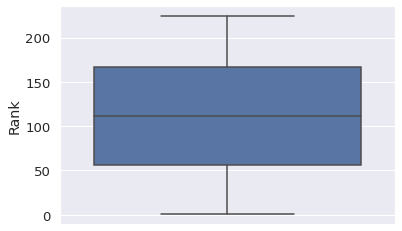

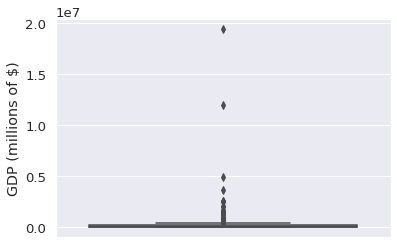

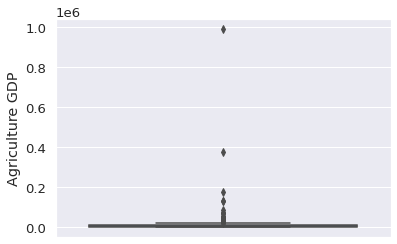

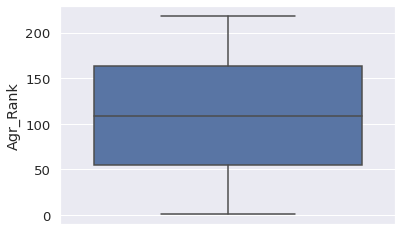

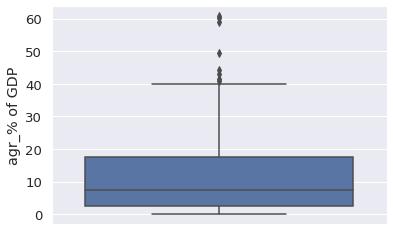

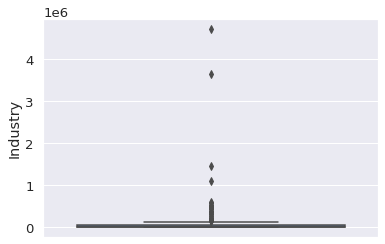

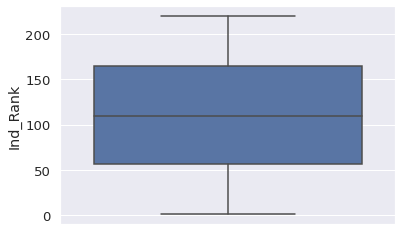

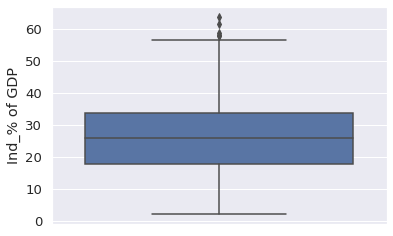

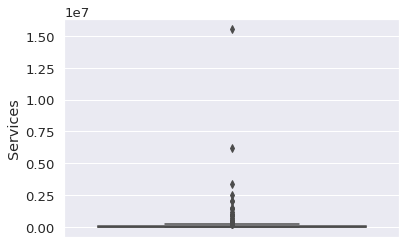

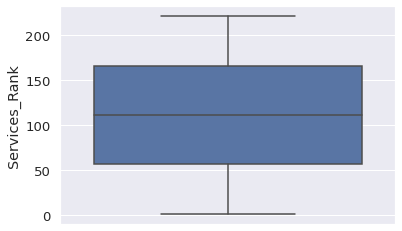

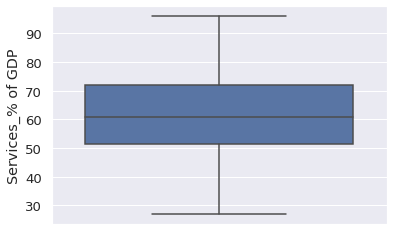

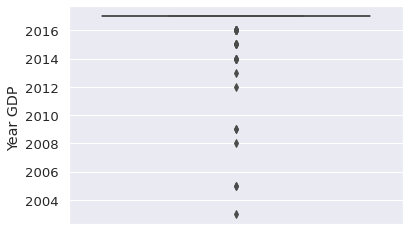

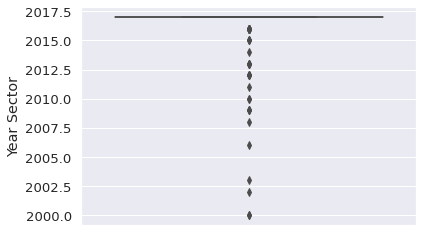

In [364]:
import matplotlib.pyplot as plt
import seaborn as sns
col=['Rank', 'GDP (millions of $)', 'Agriculture GDP',
       'Agr_Rank', 'agr_% of GDP', 'Industry', 'Ind_Rank', 'Ind_% of GDP',
       'Services', 'Services_Rank', 'Services_% of GDP', 'Year GDP ',
       'Year Sector']

for j in col:
  plt.figure()
  sns.boxplot(y=j,data=df)

#### Find out the top performing sector (Agriculture, Industry and Others) in the country

- we are using the `idxmax` to getting the max GDP sector column name

In [365]:
df['Top Performing Sector'] = df[['Agriculture GDP', 'Industry', 'Services']].idxmax(axis=1)


In [366]:
df['Top Performing Sector GDP']=df[['Agriculture GDP', 'Industry', 'Services']].max(axis=1)

#### Find out the relation between top performing sector for a country and it's GDP Rank.

- with the below data we can find out those country have top performing sector as an Agriculture GDP has a lower GDP rank then other 2 because the rank mean is the highest--`166.75`

- And on the 2nd there is industry sector's country with the average mean-- `111`

- Services is the top performing sector with the avrage mean--`109.15`

`Concusion:- Those country who's top performing sector Services has the lower Rank in GDP.
`

In [368]:
df.groupby('Top Performing Sector')[['Top Performing Sector GDP','Rank']].mean()

,Top Performing Sector GDP,Rank
Top Performing Sector,,
Agriculture GDP,2871.125000,166.750000
Industry,36657.800000,111.000000
Services,273346.623711,109.149485


- As we have observe there is inversely proportional relationship between rank and Top performing sector GDP as you can see below heatmap chart 

<Axes: >

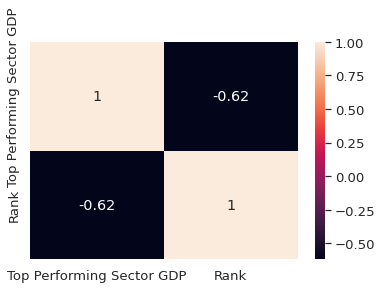

In [369]:
sns.heatmap(df.groupby('Top Performing Sector')[['Top Performing Sector GDP','Rank']].mean().corr(),annot=True)

#### Use a library like pycountry and find out continent wise Top performing Sector

- installing the pycountry_convert lib
- There are some noise in the country column fixed that
-Creating the function to get the continents for the country 

In [370]:
!pip install pycountry-convert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [371]:
df['Country/Economy']=df['Country/Economy'].str.replace('Burma','Myanmar')
df['Country/Economy']=df['Country/Economy'].str.replace("Cote d'Ivoire",'Ivory Coast')
df['Country/Economy']=df['Country/Economy'].str.replace('West Bank','Palestine')
df['Country/Economy']=df['Country/Economy'].str.replace('The Bahamas','Bahamas')

In [372]:
import pycountry_convert as pc
def get_continent_name(name):
    try:
        alpha2_code = pc.country_name_to_country_alpha2(name)
        continent_code = pc.country_alpha2_to_continent_code(alpha2_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except KeyError:
        return pd.NA

In [373]:
df['continent'] = df['Country/Economy'].apply(get_continent_name)

- Because of pycountry_convert do not have the data of these countrys
- because of some are controvalsial, some are new ect.
- pycountry_convert wrapper around the ISO standard using the pkg-isocodes database from Debian so not going to update untill data base is updated.
- So, decided to replace all the null value manually

In [374]:
mis_con=['Europe','North America','North America','Asia','Asia','Africa','North America']
df['continent'] = df['continent'].fillna(pd.Series(mis_con))


- In the below cell we can see Top performing sector GDP and Rank continent wise

In [375]:
df.groupby('continent')[['Top Performing Sector GDP','Rank']].mean()

,Top Performing Sector GDP,Rank
continent,,
Africa,24395.076923,128.538462
Asia,341931.916667,75.562500
Europe,311331.130435,79.282609
North America,556473.093750,139.062500
Oceania,57259.450000,181.400000
South America,219092.000000,74.166667


- In the below cell we can see there is negative relationship between Top Performing Sector GDP and Rank with each continent

<Axes: >

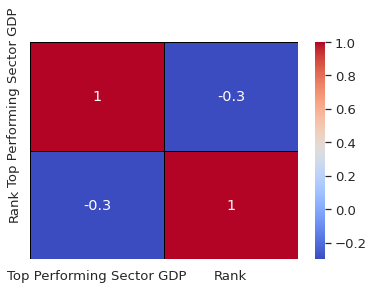

In [376]:
sns.heatmap(df.groupby('continent')[['Top Performing Sector GDP','Rank']].mean().corr(),annot=True, cmap='coolwarm', linewidths=1, linecolor='black')

#### Identify continent and their average GDP, Top Performing Sector and percentage of contribution by other sectors. Explain the outcome

- with this we can observe that Services are the leader GDP sector in each continent we can also se the percentage contribution with is more than `50%` in each case
-- In this we find out the `mean` of `total GDP` and `MAX_sector_GDP` for each continent
-- then we canculate the percentage of contribution of `MAX_sector_GDP` with in entrire GDP continent wise





In [377]:
df1 = df.groupby(['continent']).agg({'Top Performing Sector GDP': 'mean', 
                                      'GDP (millions of $)': 'mean',
                                      'Top Performing Sector': lambda x: x.iloc[0]})
df1['% of contribution']=round(df.groupby(['continent'])['Top Performing Sector GDP'].mean()/df.groupby('continent')['GDP (millions of $)'].mean()*100,2)
df1

,Top Performing Sector GDP,GDP (millions of $),Top Performing Sector,% of contribution
continent,,,,
Africa,24395.076923,42494.057692,Services,57.41
Asia,341931.916667,594040.041667,Services,57.56
Europe,311331.130435,433462.239130,Services,71.82
North America,556473.093750,710856.937500,Services,78.28
Oceania,57259.450000,81870.950000,Services,69.94
South America,219092.000000,327660.500000,Services,66.87


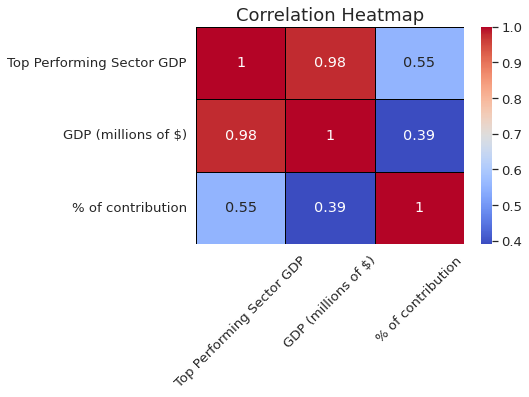

In [378]:
corr = df1.corr()

sns.set(font_scale=1.2)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=1, linecolor='black')

plt.title("Correlation Heatmap", fontsize=18)

plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()


## Add the Cells below and Find out more underlying Trends from the dataset (***Bonus Points***)
- Make sure to write your hypothesis and test based on it
- if hypothesis is not correct, explain what could be the reason

- In the below we findout the top 10 company with highest GDP

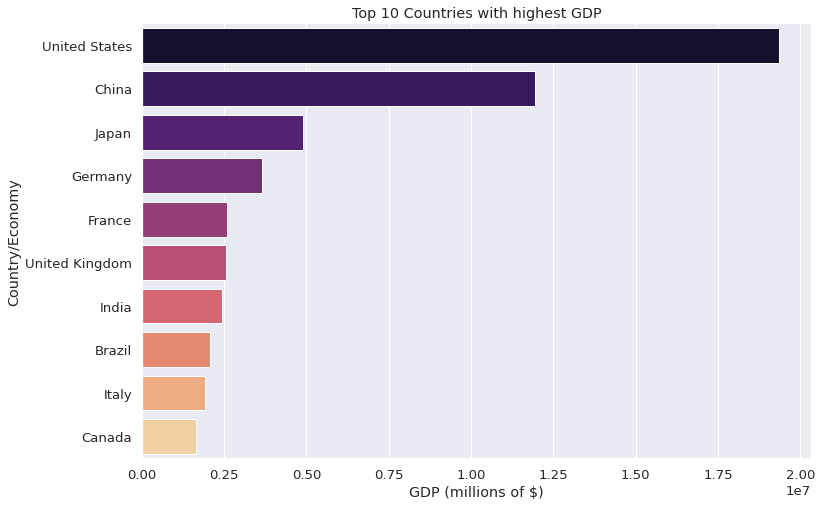

In [379]:
top_10_gdp = df.nlargest(10, 'GDP (millions of $)')

plt.figure(figsize=(12,8))
sns.barplot(data=top_10_gdp, y='Country/Economy', x='GDP (millions of $)', palette='magma')
plt.xlabel('GDP (millions of $)')
plt.ylabel('Country/Economy')
plt.title('Top 10 Countries with highest GDP')
plt.show()

- In the below we findout the top 10 company with highest Agriculture GDP

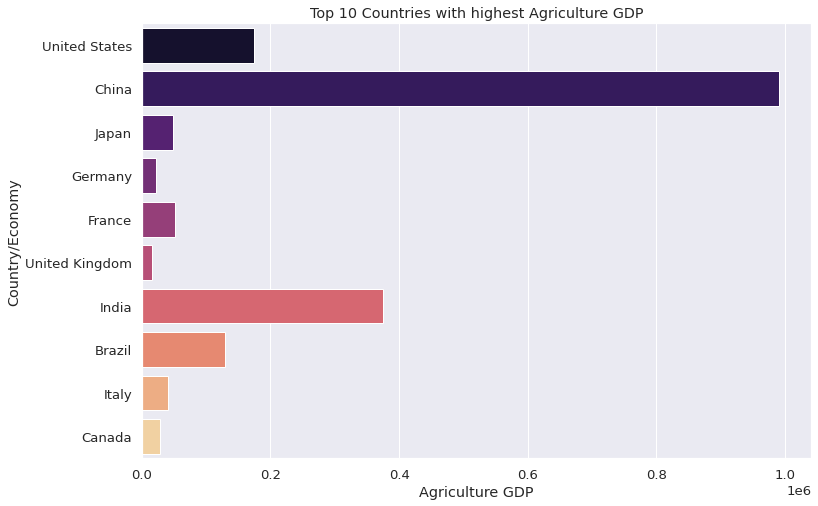

In [380]:
top_10_Agriculture_GDP = df.nlargest(10, 'Agriculture GDP')

plt.figure(figsize=(12,8))
sns.barplot(data=top_10_gdp, y='Country/Economy', x='Agriculture GDP', palette='magma')
plt.xlabel('Agriculture GDP')
plt.ylabel('Country/Economy')
plt.title('Top 10 Countries with highest Agriculture GDP')
plt.show()

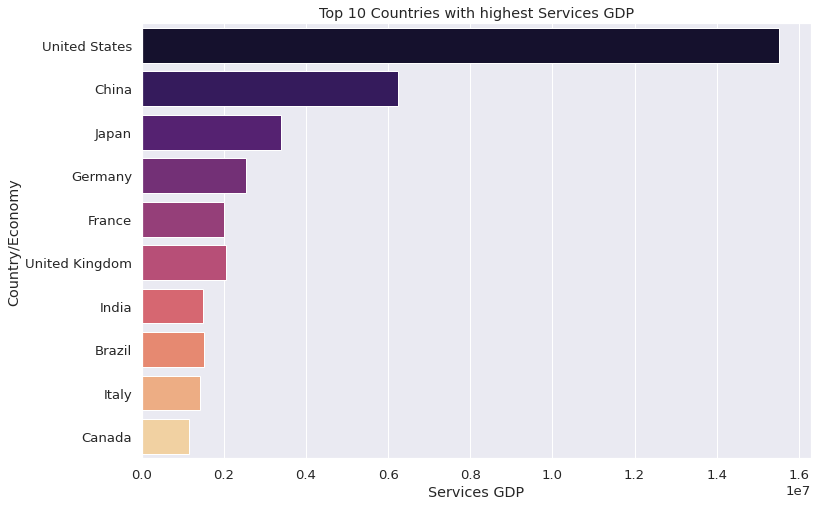

In [381]:
top_10_Agriculture_GDP = df.nlargest(10, 'Services')

plt.figure(figsize=(12,8))
sns.barplot(data=top_10_gdp, y='Country/Economy', x='Services', palette='magma')
plt.xlabel('Services GDP')
plt.ylabel('Country/Economy')
plt.title('Top 10 Countries with highest Services GDP')
plt.show()

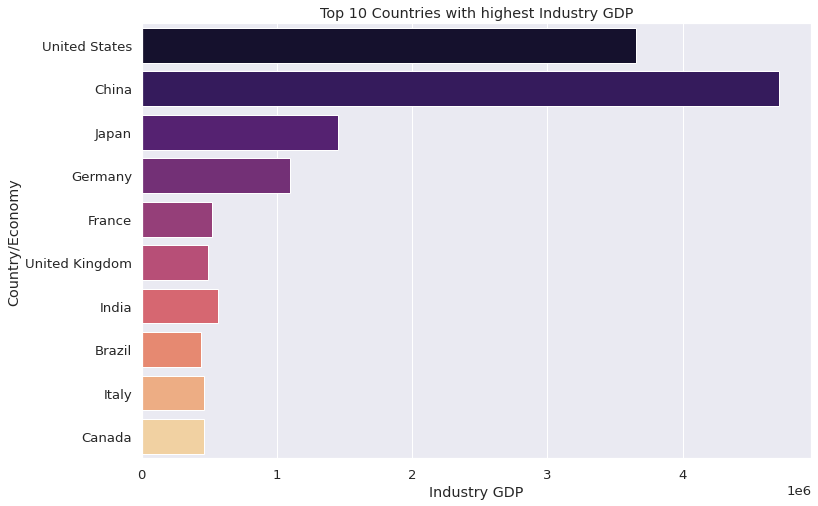

In [382]:
top_10_Agriculture_GDP = df.nlargest(10, 'Industry')

plt.figure(figsize=(12,8))
sns.barplot(data=top_10_gdp, y='Country/Economy', x='Industry', palette='magma')
plt.xlabel('Industry GDP')
plt.ylabel('Country/Economy')
plt.title('Top 10 Countries with highest Industry GDP')
plt.show()

# Write a summery of the Analysis in bullet points in this section **(Mandatory)**

- First, we observed that some cells had a - instead of a NULL value, so we replaced them with NULL.

- We dropped the NULL values since they were not many.

- We cleaned the country column by removing any noise.

- We replaced the column data type with the correct one.

- Outliers analysis showed that the data presented in the columns were correct, but there were outliers that we decided not to remove.

- We made two new columns to find the largest GDP sectors - one is categorical, which represents the sector name, and the other represents the sector GDP.

- Agriculture sector: The GDP rank of countries with a top-performing agriculture sector is lower than the other two sectors, with a mean rank of 166.75.

- Industry sector: The GDP rank of countries with a top-performing industry sector has an average mean of 111.

- Services sector: The top-performing sector for countries is services, with an average mean of 109.15.

- In conclusion, countries whose top-performing sector is services have a lower GDP rank, and there is a negative relationship between the top-performing sector GDP and rank.

- The highest GDP continent is Asia with an average GDP of 341931 and rank of 75.

- Services sector is the highest sector in each continent.

- The US is the highest GDP nation.

- China is the highest GDP nation in the Agriculture sector.

- The US is the largest GDP nation in the Services sector.

- The US is the largest GDP nation in the Industry sector.